### This code is doing preprocessing of the raw texts news, and do the analysis of the clustering.
- Removal
  - Remove urls
  - Remove Chinese characters
  - Remove datetimes mm/dd/yyyy
- Full text detection
  - Filter out other redundant information !!!
  - Capture from "Full Text" to "Subject"
- Pre-processing
  - Stopwords = stopwords.txt
  - Change synonyms in synonyms.txt
  - Continuous words = continuous-words.txt
  - New York ==> new-york

In [44]:
import nltk
import os
import re
import ast
import hdbscan
import umap
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn_extra.cluster import KMedoids
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from transformers import BertModel, BertTokenizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from tqdm import tqdm

import nltk
import os
import re
import hdbscan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
import umap
import seaborn as sns

from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from transformers import BertModel, BertTokenizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from sklearn.decomposition import PCA


In [45]:
# Read the CSV file into a DataFrame
df = pd.read_csv('../results/preprocessed_news.csv')
texts = df['preprocessed_articles'].tolist()
txt_order = [f'{i}.txt' for i in df['id'].tolist()]
preprocessed_texts = [ast.literal_eval(t) for t in texts]
len(preprocessed_texts)

681

In [46]:
# Join inner lists into single strings
preprocessed_texts = [" ".join(text) for text in preprocessed_texts]

### DBSCAN & HDBSCAN

In [47]:
# Convert texts to TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_texts)

lda = LatentDirichletAllocation(n_components=20, random_state=42)
X_topics = lda.fit_transform(X.toarray())

In [48]:
# Use DBSCAN to get the clusterings
dbscan = DBSCAN(eps=0.1, min_samples=2)
clusters_dbscan = dbscan.fit_predict(X_topics)
print(clusters_dbscan)


[-1  0  0 -1  0  0  0 -1  0  0  0  0  1  0  0  2  0  0  0  0  3  0  0  0
  0 -1 -1  0  0  0  3  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1 -1  0  0  2  0  0  0  0  0  0  0  4  0  5
  4  0  0  0 -1  0  0  0  0  0  3  0  2  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0
  0  0  1  6  0  0  0  0  0  0 -1  0  0 -1  7  0  0  5  4  0  0  0  0  0
  0  0  0  0  8  8  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  2
  0  9 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  1  0  0  0  0
  0  0  0  0  0  8  0  7  0  0 -1 -1  0  0  0  8 -1 10  0 -1  0  0  0  0
  0  0  3  0  0  0  0  0  0  9 -1  0  0  0  0  0  0 -1  0  0  0  0  0 10
  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0 -1  0  0  0  0  0  0  0  2
  7  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0 11
  0  0  4 -1  0  0 -1  4  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0

In [49]:
# Using HDBScan to get the results
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
clusters_hdb = clusterer.fit_predict(X_topics)
clusters_hdb

array([-1, 16, -1, -1, -1,  7, -1, -1, 15, -1, 11, -1, -1, -1, 13,  1, 16,
       -1,  7,  4,  0, -1,  7,  7, 23, -1, -1, 10, 22, 17,  0, 15,  0, 10,
       13, 10,  5, -1, -1,  7, 20, -1, -1, -1, -1, -1, -1,  7, 22, 22, -1,
       -1, 22, -1, 11,  3, -1, -1, -1, 16, -1, -1, 14,  7, -1, -1, 10, 23,
        3,  2, 22, -1, -1, 15, 10, -1, -1, -1, 22,  3, -1, -1,  0, -1,  1,
       15,  5, -1, 23, -1, -1, 15, -1, 19, 22, -1, -1, -1, -1, -1,  3, -1,
       -1, -1, -1,  8, -1,  5,  7, -1, 20, 22, 22, -1, -1, 14,  0, 22, -1,
       -1,  3, -1, -1, -1,  7, -1, -1, -1, 22, 10, -1,  6, 22, -1, -1, 19,
       -1, -1,  2,  8, -1, -1, -1, -1,  3, 11, -1, -1, -1, -1, -1, 10, -1,
       -1, 22, -1, 19,  7, 16,  3, 19, 13, -1, -1, 17, 22,  4, -1, -1, -1,
       -1, -1, 22, -1, -1, -1, 15, -1, -1, -1,  3, 15, -1, 10, -1, -1, -1,
       -1, 19, 10, -1,  3, -1, 10, -1, 19, 12, -1, 22, -1,  5, -1, -1, -1,
       22, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, 16, 21,  0,  7, -1,
       -1, -1, -1,  8, -1

/var/folders/lt/1btgs6694qx9t060q62cqxkm0000gn/T/ipykernel_57389/2178770976.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Spectral', len(unique_labels))


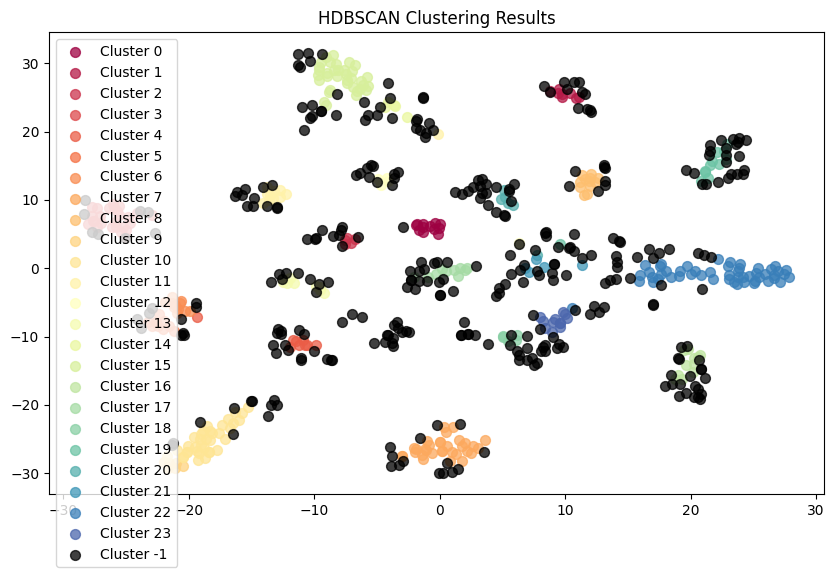

In [50]:
# Step 3: Visualize the clustering results using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(X_topics)

# Plotting
plt.figure(figsize=(10, 6))
unique_labels = set(clusters_hdb)
colors = plt.cm.get_cmap('Spectral', len(unique_labels))

for k in unique_labels:
    if k == -1:
        # continue
        # Black used for noise.
        col = [0, 0, 0, 1]
    else:
        col = colors(k)
    
    class_member_mask = (clusters_hdb == k)
    xy = embeddings_2d[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], marker='o', s=50, linewidths=1, color=col, alpha=0.75, label=f'Cluster {k}')

plt.title('HDBSCAN Clustering Results')
plt.legend()
plt.show()

/Users/buffettliu/Desktop/IM Project/gp_venv/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


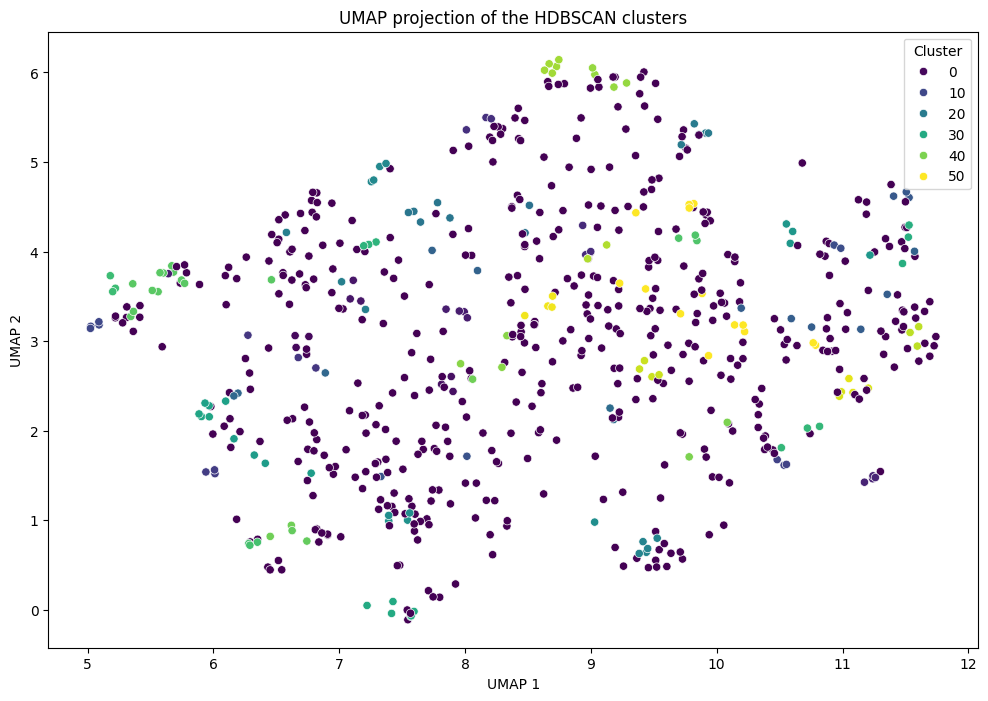

In [51]:
# Fit HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
cluster_labels = clusterer.fit_predict(X.toarray())

# Apply UMAP for dimensionality reduction
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embeddings = umap_model.fit_transform(X.toarray())

# Plot the results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], hue=cluster_labels, palette='viridis')
plt.title('UMAP projection of the HDBSCAN clusters')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Cluster')
plt.show()

In [52]:
from sklearn.metrics import adjusted_rand_score
filter_noise = [i for i in range(len(clusters_hdb)) if clusters_hdb[i] != -1]
ari_score = adjusted_rand_score(clusters_hdb[filter_noise], cluster_labels[filter_noise])
print(f"Adjusted Rand Index (ARI) between HDBSCAN and KMeans: {ari_score}")

from sklearn.metrics.cluster import normalized_mutual_info_score
nmi_score = normalized_mutual_info_score(clusters_hdb[filter_noise], cluster_labels[filter_noise])
print(f"Normalized Mutual Information (NMI) between HDBSCAN and KMeans: {nmi_score}")

Adjusted Rand Index (ARI) between HDBSCAN and KMeans: 0.005973390051588865
Normalized Mutual Information (NMI) between HDBSCAN and KMeans: 0.31589012773083425


### TF-IDF K-medoid

In [53]:
# Convert texts to TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_texts)

# Perform K-Medoids clustering
kmedoids = KMedoids(n_clusters=5, random_state=0).fit(X)

# Get cluster centers (medoids)
medoid_indices = kmedoids.medoid_indices_
medoids = [preprocessed_texts[index] for index in medoid_indices]

# Get the cluster labels
labels = kmedoids.labels_

# Print the center of gravity (medoids) of each cluster
for i, medoid in enumerate(medoids):
    print(f"Cluster {i + 1} medoid: {medoid}")

Cluster 1 medoid: asian_americans fear resolve trethan asian_americans fear resolve journal falcon lib csub asian_american fear resolve check onesearch availability calstate csub rft_val_fmt info ofi fmt kev journal genre article sid proq proq asian_american express resolve journal issn date volume issue spage trethan phaedra journal btitle info info none allison wang cherry hill resident come country generation immigrant believe ideal make culture diversity accounting director healthcare company mother attract talented people asian_american wonder country sign attack asian_american bring misplace blame covid pandemic create sense fear diverse community make culture nationality language history see monolith murder people woman atlanta fuel asian_american jersey sense resolve time act end hate zoom meeting arrange alliance people talk experience discrimination racism fear family express hope way killing george floyd spark reckoning treatment shooting bring recognition support action sto

In [54]:
for i, medoid in enumerate(medoid_indices):
    print(f"Cluster {i + 1} medoid: {txt_order[medoid]}")

Cluster 1 medoid: 344.txt
Cluster 2 medoid: 625.txt
Cluster 3 medoid: 619.txt
Cluster 4 medoid: 628.txt
Cluster 5 medoid: 649.txt


In [55]:
# Create dictionaries to store each cluster
tfidf_kmedoid_cluster = {}
tfidf_kmedoid_cluster_idx = {}
labels = kmedoids.labels_

for index, label in enumerate(labels):
    if label not in tfidf_kmedoid_cluster:
        tfidf_kmedoid_cluster[label] = []
        tfidf_kmedoid_cluster_idx[label] = []
        
    tfidf_kmedoid_cluster[label].append(preprocessed_texts[index])
    tfidf_kmedoid_cluster_idx[label].append(index)

# Print the dictionary
for cluster_id, texts in tfidf_kmedoid_cluster.items():
    print(f"Cluster {cluster_id + 1} has {len(texts)} items: {texts}")

Cluster 2 has 201 items: ['see chinatown restaurateur face ruin situation neighborhood catch eye developer kohli see chinatown restaurateur face ruin situation neighborhood catch eye developer falcon lib csub falcon lib csub ive see restaurateur check onesearch availability calstate falcon lib csub csub rft_val_fmt info ofi fmt kev journal genre article sid proq proq see restaurate volume issue spage diti isbn jtitle btitle info info none full_text china king month phone ring day nothing owner doris huang day order nobody see rent chinatown restaurant employee remain payroll huang pool saving ebb day money china king need stay sign profit start pour close year restaurant week spar decision eateries state china king suffer distancing guideline stave ruin covid response restaurateur implement cost cut measure include hour shorten menu layoff slew restaurant closure signal future neighborhood haul everyone city councilor michelle pain community boston country decades institution taiwan go

In [56]:
""" Get keywords of each clusters """
# Create a DataFrame with the TF-IDF scores and the corresponding cluster labels
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df['cluster'] = labels

# Calculate the average TF-IDF score for each word within each cluster
cluster_keywords = {}
for cluster in range(5):
    cluster_data = tfidf_df[tfidf_df['cluster'] == cluster].drop('cluster', axis=1)
    cluster_mean_tfidf = cluster_data.mean(axis=0)
    top_keywords = cluster_mean_tfidf.sort_values(ascending=False).head(10).index.tolist()
    cluster_keywords[cluster] = top_keywords

# Print the top keywords for each cluster
for cluster, keywords in cluster_keywords.items():
    print(f"Cluster {cluster + 1} top keywords: {', '.join(keywords)}")


Cluster 1 top keywords: people, student, china, csub, school, asian_american, time, racism, virus, coronavirus
Cluster 2 top keywords: crime, hate, asian_american, racism, people, report, incident, csub, community, police
Cluster 3 top keywords: crime, attack, hate, police, year, man, asian_american, info, woman, charge
Cluster 4 top keywords: violence, shooting, hate, spa, crime, woman, atlanta, people, community, asian_american
Cluster 5 top keywords: hate, report, asian_american, community, incident, csub, people, info, aapi, racism


In [57]:
""" Get order of distance from nearest to farest in each cluster """
# Create a dictionary to hold the ordered lists
ordered_clusters = {i: [] for i in range(kmedoids.n_clusters)}
ordered_clusters_idx = {i: [] for i in range(kmedoids.n_clusters)}

# Compute distances and sort within each cluster
for cluster in range(kmedoids.n_clusters):
    medoid_index = medoid_indices[cluster]
    distances = []
    distances_txt = []
    
    for index, label in enumerate(labels):
        if label == cluster:
            distance = np.linalg.norm(X[index].toarray() - X[medoid_index].toarray())
            distances.append((distance, preprocessed_texts[index]))
            distances_txt.append((distance, txt_order[index]))
    
    # Sort distances in ascending order (nearest to farthest)
    distances.sort(key=lambda x: x[0])
    distances_txt.sort(key=lambda x: x[0])
    
    # Store the sorted list in the dictionary
    ordered_clusters[cluster] = distances
    ordered_clusters_idx[cluster] = distances_txt

# Print the ordered lists for each cluster
for cluster, items in ordered_clusters.items():
    print(f"Cluster {cluster + 1} ordered by distance to medoid:")
    for distance, text in items:
        print(f"Distance: {distance:.4f}, Text: {text}")

Cluster 1 ordered by distance to medoid:
Distance: 0.0000, Text: asian_americans fear resolve trethan asian_americans fear resolve journal falcon lib csub asian_american fear resolve check onesearch availability calstate csub rft_val_fmt info ofi fmt kev journal genre article sid proq proq asian_american express resolve journal issn date volume issue spage trethan phaedra journal btitle info info none allison wang cherry hill resident come country generation immigrant believe ideal make culture diversity accounting director healthcare company mother attract talented people asian_american wonder country sign attack asian_american bring misplace blame covid pandemic create sense fear diverse community make culture nationality language history see monolith murder people woman atlanta fuel asian_american jersey sense resolve time act end hate zoom meeting arrange alliance people talk experience discrimination racism fear family express hope way killing george floyd spark reckoning treatmen

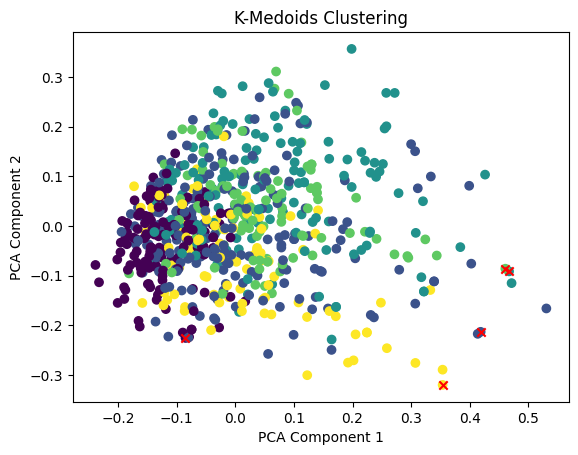

In [58]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X.toarray())

# Plot the clusters
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=kmedoids.labels_, cmap='viridis', marker='o')
plt.scatter(reduced_X[medoid_indices, 0], reduced_X[medoid_indices, 1], c='red', marker='x')
plt.title('K-Medoids Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


### Word2vector

In [59]:
# Word2Vec
model = Word2Vec(preprocessed_texts, vector_size=50, window=3, min_count=1, workers=4)
def sentence_vector(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

sentence_vectors = np.array([sentence_vector(sentence, model) for sentence in preprocessed_texts])

# Perform K-Medoids clustering
kmedoids = KMedoids(n_clusters=5, random_state=0).fit(sentence_vectors)

# Get cluster centers (medoids)
medoid_indices = kmedoids.medoid_indices_
medoids = [preprocessed_texts[index] for index in medoid_indices]

# Print the center of gravity (medoids) of each cluster
for i, medoid in enumerate(medoids):
    print(f"Cluster {i + 1} medoid: {medoid} \n{'=' * 50}")

Cluster 1 medoid: community edge shoot community edge shoot globalpost falcon lib csub asian_american community edge check onesearch availability calstate csub rft_val_fmt info ofi fmt kev journal genre article sid proq proq community edge shoot globalpost date volume issue spage jtitle globalpost btitle info info none top world morning news roundup write editor world subscribe year man charge kill people include woman area massage parlors gunman face count murder count assault police continue investigate motive shooting attack happen backdrop rise violence asian_american georgia michelle tell world community picture rise act act asian_american milieu incident happen community people core people scar gunman tell police tuesday murder motivate statement receive skepticism location fact victim woman descent crime asian_american rise year coronavirus hit want raise awareness magnitude type hate crime like start raise awareness increase safety community make people community feel report in

/Users/buffettliu/Desktop/IM Project/gp_venv/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


In [60]:
for i, medoid in enumerate(medoid_indices):
    print(f"Cluster {i + 1} medoid: {txt_order[medoid]}")

Cluster 1 medoid: 357.txt
Cluster 2 medoid: 470.txt
Cluster 3 medoid: 576.txt
Cluster 4 medoid: 4.txt
Cluster 5 medoid: 523.txt


In [15]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(sentence_vectors)

# Plot the clusters
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=kmedoids.labels_, cmap='viridis', marker='o')
plt.scatter(reduced_X[medoid_indices, 0], reduced_X[medoid_indices, 1], c='red', marker='x')
plt.title('K-Medoids Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
